In [ ]:
#https://github.com/cr21/Behavior-of-Linear-Model-Machine-Learning-Study/blob/main/SVM_RBF_Kernel_8E.ipynb

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
X,y = make_classification(n_samples = 5000,n_features = 5,n_redundant=2,n_classes=2,weights=[0.7],class_sep=0.7,random_state=15)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)
X_cv,X_test,y_cv,y_test = train_test_split(X_test,y_test,test_size = 0.5,random_state=42)

print("X Train shape",X_train.shape )
print("X Test shape",X_test.shape )
print("X Cv shape",X_cv.shape )                                                                                   


X Train shape (3000, 5)
X Test shape (1000, 5)
X Cv shape (1000, 5)


In [ ]:
clf=SVC(gamma=0.001,C=100)
clf.fit(X_train,y_train)

SVC(C=100, gamma=0.001)

In [ ]:
vector_indices = clf.support_
vector_dual_coeffs = clf.support_vectors_

In [ ]:
def rbf_func(x,xi,gamma):
  return np.exp(-gamma*np.sum((x-xi)**2,axis=-1))

In [ ]:
def kernel_rbf(support_vectors,x,gamma):
  kernels = np.zeros((x.shape[0],support_vectors.shape[0]))  #creating kernel matrix cuz we can further fill it with values
  for index,point in enumerate(x):
    for index1,vector in enumerate(support_vectors): #each point has vectors
      rbf_val = rbf_func(point,vector,gamma)
      kernels[index][index1] = rbf_val
  return kernels    

In [ ]:
def decision_func(x,intercept,dual_coeff,support_vector,gamma):
  
  dec_func = np.sum(dual_coeff*kernel_rbf(support_vector,x,gamma),axis=-1) + intercept
  return dec_func

In [ ]:
dec_func = decision_func(X_cv,clf.intercept_,clf.dual_coef_,clf.support_vectors_,0.001)

In [ ]:
print(dec_func)

[-1.76324902e+00  1.69669185e+00 -2.40989077e+00  1.85215053e+00
 -3.16365721e+00  1.12675140e+00 -3.48911789e-01 -3.51100862e+00
  1.66030109e+00 -1.94461157e+00 -2.50990580e+00 -1.13885723e+00
 -3.82011792e+00 -1.14015157e+00 -2.57592289e+00  7.15114991e-01
 -1.31965974e+00 -7.12222868e-01  4.51215568e-01  1.91762348e+00
  1.29668096e+00 -2.47773770e+00 -1.60578549e+00  1.44977701e+00
 -1.15173585e+00 -1.96688593e+00  7.31183803e-01 -1.87042765e+00
 -3.72478152e+00  1.13226842e+00 -3.20592040e+00 -2.42381493e+00
 -8.66691822e-01 -1.02627406e+00 -2.66889832e+00 -2.53630376e+00
 -1.43084378e+00  5.07972260e-01 -1.93942900e+00 -3.58481569e+00
 -1.80569419e+00 -2.94252342e+00 -2.05874093e+00 -3.75129300e+00
 -5.14995187e-01 -1.87778644e+00  4.54380920e-01 -2.52663321e+00
  4.33382680e-01 -3.35342530e+00 -3.64579332e+00 -3.50988882e+00
  3.63530370e-01 -1.19687415e+00 -6.16951395e-01 -1.54943669e-01
 -3.99353666e+00 -3.36837041e-01 -3.66844213e+00 -2.73126333e+00
 -3.45612820e+00  9.78998

Hence, we have the decision boundary values.

Task F: Implementing Platt Scaling to find P(Y==1|X)

In [ ]:
array_vals,array_count=np.unique(y_train,return_counts=True)
print(array_vals,array_count)

[0 1] [2070  930]


In [ ]:
def calibProb(Y):
  n_positive = array_count[1]
  n_negative = array_count[0]
  print("positive values:",n_positive)
  print("negative values:",n_negative)
  calib_y_positive = (n_positive + 1) / (n_positive + 2)
  calib_y_negative = 1/ (n_negative + 2)
  return calib_y_positive,calib_y_negative

In [ ]:
calib_pos_cv,calib_neg_cv = calibProb(y_cv)
print("calib_pos_cv: {}, calib_neg_cv; {}".format(calib_pos_cv,calib_neg_cv))

positive values: 930
negative values: 2070
calib_pos_cv: 0.9989270386266095, calib_neg_cv; 0.00048262548262548264


In [ ]:
def updated_y(y, y_train ):
  updated_y = []
  calib_y_pos, calib_y_neg = calibProb(y_train)
  for i in y:
    if i == 1:
      updated_y.append(calib_y_pos)
    else:
      updated_y.append(calib_y_neg)
  return updated_y

In [ ]:
def sigmoid(w,x,b):
  return 1/(1+np.exp(-(np.dot(x,w.T)+b)))

In [ ]:
def log_loss(w,b,x,y):
  sum_log = 0
  for i in range(n):
    sum_log += y[i]*np.log10(sigmoid(w,x[i],b)) + (1-y[i])*np.log10(1-sigmoid(w,x[i],b))
    return -1*sum_log/n

In [ ]:
n = len(dec_func)
f_cv = dec_func
w = np.zeros_like(f_cv[0],)
b = 0
eta0 = 0.001
alpha = 0.0001

cv_loss = []
EPOCH = 1
prevLoss = float("inf")
y = updated_y(y_cv,y_train)
for epoch in range(0,10):
  
  for j in range(n):
    w =  ((1-((eta0*alpha)/n)) * w) + (eta0 * f_cv[j]) * (y[j] -sigmoid(w,f_cv[j],b))
    b = b + (eta0)*(y[j] - sigmoid(w,f_cv[j],b))
    loss = log_loss(w,b,f_cv,y)
    
  loss_val = log_loss(w,b,f_cv,y)
  cv_loss.append(loss_val)


positive values: 930
negative values: 2070


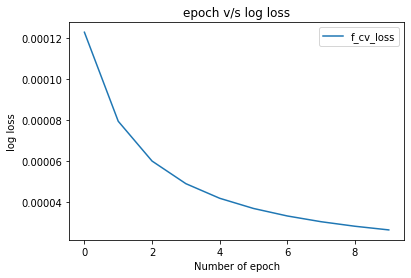

In [ ]:
import matplotlib.pyplot as plt 
epoch=np.arange(0,10) 
plt.plot(epoch,cv_loss,label='f_cv_loss')
plt.legend()
plt.xlabel("Number of epoch")
plt.ylabel("log loss")
plt.title("epoch v/s log loss")
plt.show()

In [ ]:
optimized_w = w
optimized_b = b
print("optimized_w {} optimized_b {}".format(optimized_w,optimized_b) )

optimized_w 1.4961567940623555 optimized_b -0.14743287088617718


In [ ]:
f_test = decision_func(X_test,clf.intercept_, clf.dual_coef_, clf.support_vectors_, 0.001 )

In [ ]:
probabilities = sigmoid(optimized_w, f_test, optimized_b)

In [ ]:
print(probabilities)

[7.15835598e-02 3.93508097e-02 2.09817473e-01 3.07843074e-02
 2.87432916e-03 8.78846417e-03 2.21950517e-02 9.85573367e-01
 5.46705913e-03 8.50868949e-01 3.44213277e-02 7.93342336e-01
 2.93181526e-01 4.02782095e-02 2.20052683e-01 9.92221862e-01
 6.35977323e-03 9.97045618e-03 1.20408968e-01 1.17239833e-02
 9.39387600e-01 3.56933034e-02 9.10177223e-01 1.21334283e-01
 3.27608433e-02 7.15013460e-01 9.20146092e-01 1.86272907e-01
 1.28319719e-02 7.85014868e-01 3.20626660e-02 9.64413276e-01
 5.87373656e-02 4.57107501e-03 1.02460696e-02 1.01025253e-01
 1.16055257e-01 2.56894184e-02 9.44126215e-01 5.49509621e-03
 1.54951063e-03 6.02892079e-01 2.80408403e-02 9.01741831e-03
 9.19265183e-03 5.63022442e-02 1.08071747e-02 2.01867186e-02
 8.82612230e-01 5.38719431e-02 1.27535169e-02 2.62326227e-02
 2.20125815e-02 6.09686452e-01 9.03169286e-01 9.53987942e-01
 4.29623326e-03 9.72336657e-01 7.37660113e-01 8.40157832e-03
 2.72188163e-02 9.39215505e-01 3.15798553e-02 1.40879481e-02
 4.94486199e-02 1.993658